In [1]:
import os
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import transforms

from data import create_dataloaders
from engine import train
from utils import plot_loss_curves
from model import (
    ShallowModel, 
    ShallowModelWithDropout, 
    ShallowModelNormalized, 
    DeepModel,
    MixMLP
)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

/home/abtin/anaconda3/envs/torchspace/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'cuda'

In [2]:
NUM_WORKERS = os.cpu_count()
transformer = transforms.Compose([transforms.ToTensor()])
train_dataloader, test_dataloader, class_names = create_dataloaders(transformer, 32, NUM_WORKERS)

class names:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
length train data:  60000 
length train targets:  60000 
length test data:  10000 
length test targets:  10000


In [3]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


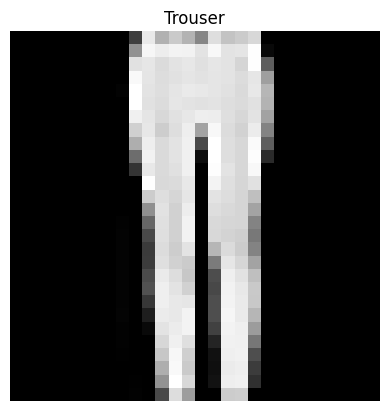

In [4]:
torch.manual_seed(0)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Effect of depth

In [5]:
torch.manual_seed(42)
shallow_model = ShallowModel(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model.parameters(), lr=0.1)

In [6]:
results_shallow = train(
    shallow_model,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

 10%|████▍                                       | 1/10 [00:05<00:47,  5.22s/it]

Epoch: 1 | train_loss: 0.6794 | train_acc: 0.7531 | test_loss: 0.5442 | test_acc: 0.8088



 20%|████████▊                                   | 2/10 [00:09<00:39,  4.94s/it]

Epoch: 2 | train_loss: 0.4969 | train_acc: 0.8234 | test_loss: 0.4719 | test_acc: 0.8319



 30%|█████████████▏                              | 3/10 [00:14<00:34,  4.87s/it]

Epoch: 3 | train_loss: 0.4626 | train_acc: 0.8350 | test_loss: 0.4778 | test_acc: 0.8285



 40%|█████████████████▌                          | 4/10 [00:19<00:28,  4.82s/it]

Epoch: 4 | train_loss: 0.4453 | train_acc: 0.8397 | test_loss: 0.5014 | test_acc: 0.8251



 50%|██████████████████████                      | 5/10 [00:24<00:23,  4.80s/it]

Epoch: 5 | train_loss: 0.4321 | train_acc: 0.8444 | test_loss: 0.4385 | test_acc: 0.8423



 60%|██████████████████████████▍                 | 6/10 [00:29<00:19,  4.79s/it]

Epoch: 6 | train_loss: 0.4222 | train_acc: 0.8482 | test_loss: 0.4719 | test_acc: 0.8313



 70%|██████████████████████████████▊             | 7/10 [00:33<00:14,  4.77s/it]

Epoch: 7 | train_loss: 0.4127 | train_acc: 0.8500 | test_loss: 0.4396 | test_acc: 0.8407



 80%|███████████████████████████████████▏        | 8/10 [00:38<00:09,  4.78s/it]

Epoch: 8 | train_loss: 0.4068 | train_acc: 0.8543 | test_loss: 0.4815 | test_acc: 0.8344



 90%|███████████████████████████████████████▌    | 9/10 [00:43<00:04,  4.77s/it]

Epoch: 9 | train_loss: 0.4027 | train_acc: 0.8543 | test_loss: 0.4515 | test_acc: 0.8390


100%|███████████████████████████████████████████| 10/10 [00:48<00:00,  4.81s/it]

Epoch: 10 | train_loss: 0.3993 | train_acc: 0.8548 | test_loss: 0.4397 | test_acc: 0.8442


In [7]:
torch.manual_seed(42)
deep_model = DeepModel(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=deep_model.parameters(), lr=0.1)

In [8]:
results_deep = train(
    deep_model,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

 10%|████▍                                       | 1/10 [00:06<00:58,  6.53s/it]

Epoch: 1 | train_loss: 1.7130 | train_acc: 0.3098 | test_loss: 0.9814 | test_acc: 0.5680



 20%|████████▊                                   | 2/10 [00:13<00:52,  6.58s/it]

Epoch: 2 | train_loss: 0.7837 | train_acc: 0.6904 | test_loss: 0.6578 | test_acc: 0.7347



 30%|█████████████▏                              | 3/10 [00:19<00:46,  6.60s/it]

Epoch: 3 | train_loss: 0.7061 | train_acc: 0.7290 | test_loss: 0.6588 | test_acc: 0.7347



 40%|█████████████████▌                          | 4/10 [00:26<00:39,  6.64s/it]

Epoch: 4 | train_loss: 0.6233 | train_acc: 0.7568 | test_loss: 0.6031 | test_acc: 0.7813



 50%|██████████████████████                      | 5/10 [00:33<00:33,  6.64s/it]

Epoch: 5 | train_loss: 0.5653 | train_acc: 0.7914 | test_loss: 0.5432 | test_acc: 0.7998



 60%|██████████████████████████▍                 | 6/10 [00:39<00:26,  6.65s/it]

Epoch: 6 | train_loss: 0.5375 | train_acc: 0.8031 | test_loss: 0.6022 | test_acc: 0.7884



 70%|██████████████████████████████▊             | 7/10 [00:46<00:19,  6.64s/it]

Epoch: 7 | train_loss: 0.5217 | train_acc: 0.8086 | test_loss: 0.5302 | test_acc: 0.8105



 80%|███████████████████████████████████▏        | 8/10 [00:52<00:13,  6.61s/it]

Epoch: 8 | train_loss: 0.5048 | train_acc: 0.8151 | test_loss: 0.5085 | test_acc: 0.8154



 90%|███████████████████████████████████████▌    | 9/10 [00:59<00:06,  6.60s/it]

Epoch: 9 | train_loss: 0.5002 | train_acc: 0.8161 | test_loss: 0.5158 | test_acc: 0.8059


100%|███████████████████████████████████████████| 10/10 [01:06<00:00,  6.63s/it]

Epoch: 10 | train_loss: 0.4870 | train_acc: 0.8194 | test_loss: 0.5218 | test_acc: 0.8082


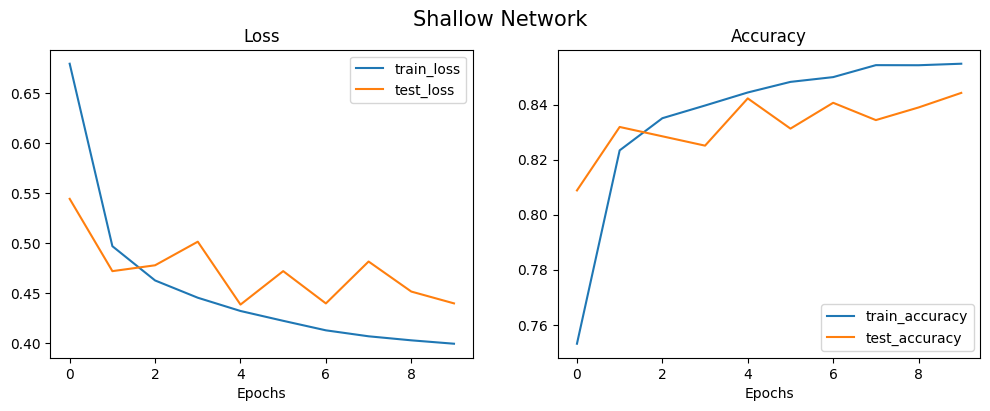

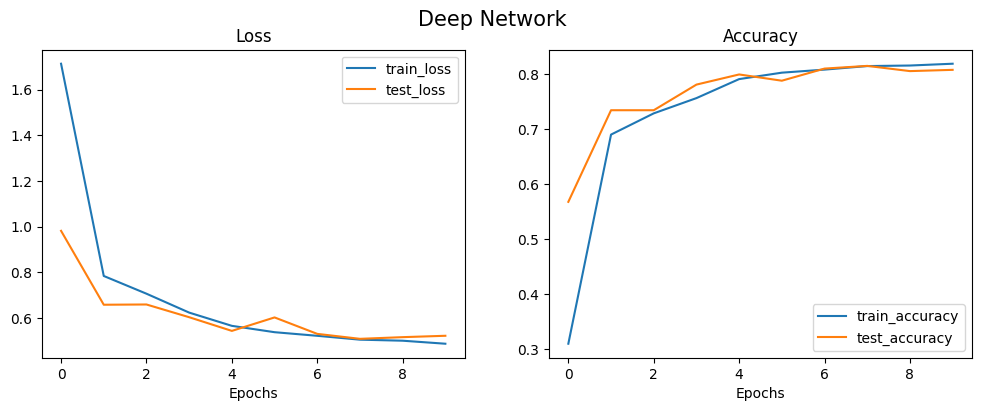

In [9]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_deep, title="Deep Network")

## Effect number of nuerons

In [10]:
torch.manual_seed(42)
shallow_model_high_neuron = ShallowModel(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_high_neuron.parameters(), lr=0.1)

In [11]:
results_shallow_high_neuron = train(
    shallow_model_high_neuron,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

 10%|████▍                                       | 1/10 [00:04<00:43,  4.88s/it]

Epoch: 1 | train_loss: 0.6092 | train_acc: 0.7762 | test_loss: 0.4569 | test_acc: 0.8340



 20%|████████▊                                   | 2/10 [00:09<00:38,  4.85s/it]

Epoch: 2 | train_loss: 0.4258 | train_acc: 0.8425 | test_loss: 0.4655 | test_acc: 0.8286



 30%|█████████████▏                              | 3/10 [00:14<00:33,  4.85s/it]

Epoch: 3 | train_loss: 0.3835 | train_acc: 0.8584 | test_loss: 0.4099 | test_acc: 0.8488



 40%|█████████████████▌                          | 4/10 [00:19<00:29,  4.85s/it]

Epoch: 4 | train_loss: 0.3560 | train_acc: 0.8675 | test_loss: 0.3810 | test_acc: 0.8607



 50%|██████████████████████                      | 5/10 [00:24<00:24,  4.83s/it]

Epoch: 5 | train_loss: 0.3380 | train_acc: 0.8750 | test_loss: 0.3886 | test_acc: 0.8603



 60%|██████████████████████████▍                 | 6/10 [00:29<00:19,  4.84s/it]

Epoch: 6 | train_loss: 0.3235 | train_acc: 0.8799 | test_loss: 0.3847 | test_acc: 0.8596



 70%|██████████████████████████████▊             | 7/10 [00:33<00:14,  4.84s/it]

Epoch: 7 | train_loss: 0.3107 | train_acc: 0.8841 | test_loss: 0.3489 | test_acc: 0.8750



 80%|███████████████████████████████████▏        | 8/10 [00:38<00:09,  4.83s/it]

Epoch: 8 | train_loss: 0.2996 | train_acc: 0.8878 | test_loss: 0.3804 | test_acc: 0.8615



 90%|███████████████████████████████████████▌    | 9/10 [00:43<00:04,  4.83s/it]

Epoch: 9 | train_loss: 0.2906 | train_acc: 0.8902 | test_loss: 0.3676 | test_acc: 0.8609


100%|███████████████████████████████████████████| 10/10 [00:48<00:00,  4.84s/it]

Epoch: 10 | train_loss: 0.2831 | train_acc: 0.8934 | test_loss: 0.3356 | test_acc: 0.8798


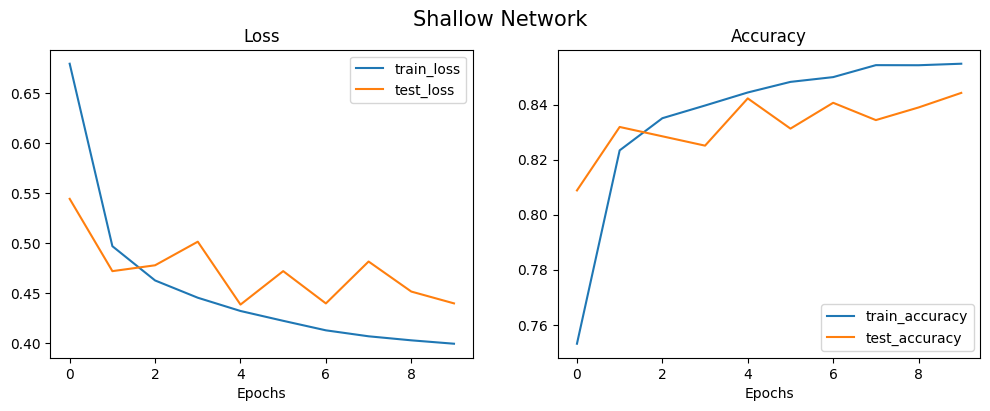

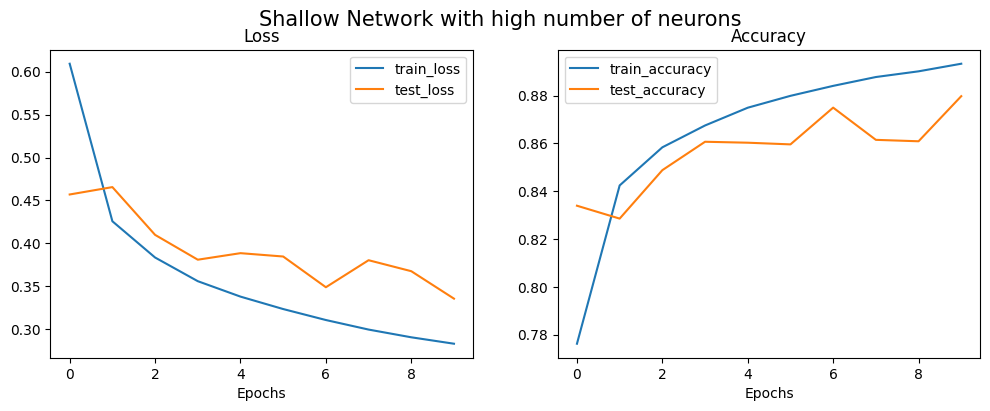

In [12]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_high_neuron, title="Shallow Network with high number of neurons")

## Effect of dropout

In [13]:
torch.manual_seed(42)
shallow_model_dropout = ShallowModelWithDropout(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_dropout.parameters(), lr=0.1)

In [14]:
results_shallow_dropout = train(
    shallow_model_dropout,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

 10%|████▍                                       | 1/10 [00:05<00:45,  5.02s/it]

Epoch: 1 | train_loss: 0.7014 | train_acc: 0.7444 | test_loss: 0.4727 | test_acc: 0.8263



 20%|████████▊                                   | 2/10 [00:10<00:40,  5.02s/it]

Epoch: 2 | train_loss: 0.5000 | train_acc: 0.8193 | test_loss: 0.4415 | test_acc: 0.8461



 30%|█████████████▏                              | 3/10 [00:15<00:35,  5.01s/it]

Epoch: 3 | train_loss: 0.4605 | train_acc: 0.8325 | test_loss: 0.4259 | test_acc: 0.8403



 40%|█████████████████▌                          | 4/10 [00:20<00:30,  5.01s/it]

Epoch: 4 | train_loss: 0.4348 | train_acc: 0.8421 | test_loss: 0.4209 | test_acc: 0.8417



 50%|██████████████████████                      | 5/10 [00:25<00:25,  5.00s/it]

Epoch: 5 | train_loss: 0.4180 | train_acc: 0.8469 | test_loss: 0.4336 | test_acc: 0.8438



 60%|██████████████████████████▍                 | 6/10 [00:29<00:19,  4.97s/it]

Epoch: 6 | train_loss: 0.4061 | train_acc: 0.8527 | test_loss: 0.3974 | test_acc: 0.8546



 70%|██████████████████████████████▊             | 7/10 [00:34<00:14,  5.00s/it]

Epoch: 7 | train_loss: 0.3956 | train_acc: 0.8549 | test_loss: 0.3860 | test_acc: 0.8627



 80%|███████████████████████████████████▏        | 8/10 [00:40<00:10,  5.01s/it]

Epoch: 8 | train_loss: 0.3903 | train_acc: 0.8576 | test_loss: 0.3678 | test_acc: 0.8662



 90%|███████████████████████████████████████▌    | 9/10 [00:45<00:05,  5.01s/it]

Epoch: 9 | train_loss: 0.3812 | train_acc: 0.8613 | test_loss: 0.4033 | test_acc: 0.8468


100%|███████████████████████████████████████████| 10/10 [00:50<00:00,  5.01s/it]

Epoch: 10 | train_loss: 0.3756 | train_acc: 0.8627 | test_loss: 0.3705 | test_acc: 0.8677


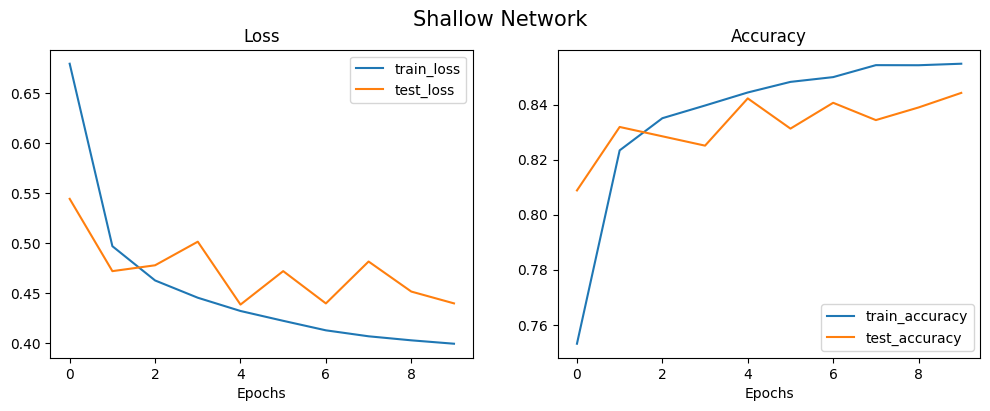

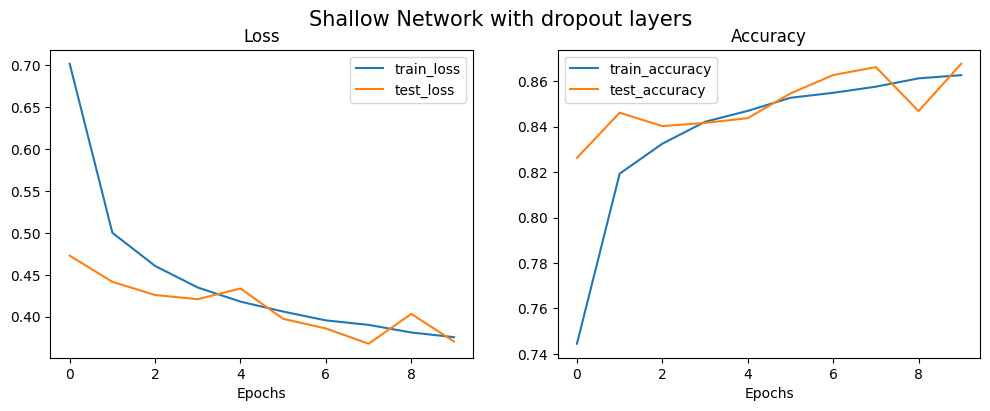

In [15]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_dropout, title="Shallow Network with dropout layers")

## Effect of early stopping

In [16]:
torch.manual_seed(42)
shallow_model_earlystopping = ShallowModel(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_earlystopping.parameters(), lr=0.1)

In [17]:
results_shallow_earlystopping = train(
    shallow_model_earlystopping,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=100,
    device=device,
    early_stopping=True)

  1%|▍                                          | 1/100 [00:04<08:01,  4.87s/it]

Epoch: 1 | train_loss: 0.6092 | train_acc: 0.7762 | test_loss: 0.4569 | test_acc: 0.8340



  2%|▊                                          | 2/100 [00:09<07:58,  4.88s/it]

Epoch: 2 | train_loss: 0.4258 | train_acc: 0.8425 | test_loss: 0.4655 | test_acc: 0.8286



  3%|█▎                                         | 3/100 [00:14<07:51,  4.86s/it]

Epoch: 3 | train_loss: 0.3835 | train_acc: 0.8584 | test_loss: 0.4099 | test_acc: 0.8488



  4%|█▋                                         | 4/100 [00:19<07:46,  4.86s/it]

Epoch: 4 | train_loss: 0.3560 | train_acc: 0.8675 | test_loss: 0.3810 | test_acc: 0.8607



  5%|██▏                                        | 5/100 [00:24<07:41,  4.85s/it]

Epoch: 5 | train_loss: 0.3380 | train_acc: 0.8750 | test_loss: 0.3886 | test_acc: 0.8603



  6%|██▌                                        | 6/100 [00:29<07:35,  4.85s/it]

Epoch: 6 | train_loss: 0.3235 | train_acc: 0.8799 | test_loss: 0.3847 | test_acc: 0.8596



  7%|███                                        | 7/100 [00:33<07:29,  4.84s/it]

Epoch: 7 | train_loss: 0.3107 | train_acc: 0.8841 | test_loss: 0.3489 | test_acc: 0.8750



  8%|███▍                                       | 8/100 [00:38<07:25,  4.85s/it]

Epoch: 8 | train_loss: 0.2996 | train_acc: 0.8878 | test_loss: 0.3804 | test_acc: 0.8615



  9%|███▊                                       | 9/100 [00:43<07:20,  4.85s/it]

Epoch: 9 | train_loss: 0.2906 | train_acc: 0.8902 | test_loss: 0.3676 | test_acc: 0.8609



 10%|████▏                                     | 10/100 [00:48<07:15,  4.84s/it]

Epoch: 10 | train_loss: 0.2831 | train_acc: 0.8934 | test_loss: 0.3356 | test_acc: 0.8798



 11%|████▌                                     | 11/100 [00:53<07:12,  4.86s/it]

Epoch: 11 | train_loss: 0.2767 | train_acc: 0.8965 | test_loss: 0.3427 | test_acc: 0.8771



 12%|█████                                     | 12/100 [00:58<07:06,  4.84s/it]

Epoch: 12 | train_loss: 0.2706 | train_acc: 0.8977 | test_loss: 0.3431 | test_acc: 0.8771



 13%|█████▍                                    | 13/100 [01:03<07:01,  4.84s/it]

Epoch: 13 | train_loss: 0.2666 | train_acc: 0.8987 | test_loss: 0.3469 | test_acc: 0.8717



 14%|█████▉                                    | 14/100 [01:07<06:56,  4.84s/it]

Epoch: 14 | train_loss: 0.2606 | train_acc: 0.9011 | test_loss: 0.3456 | test_acc: 0.8802



 15%|██████▎                                   | 15/100 [01:12<06:51,  4.84s/it]

Epoch: 15 | train_loss: 0.2537 | train_acc: 0.9043 | test_loss: 0.3655 | test_acc: 0.8742



 15%|██████▎                                   | 15/100 [01:17<07:19,  5.17s/it]

Epoch: 16 | train_loss: 0.2499 | train_acc: 0.9055 | test_loss: 0.3500 | test_acc: 0.8771


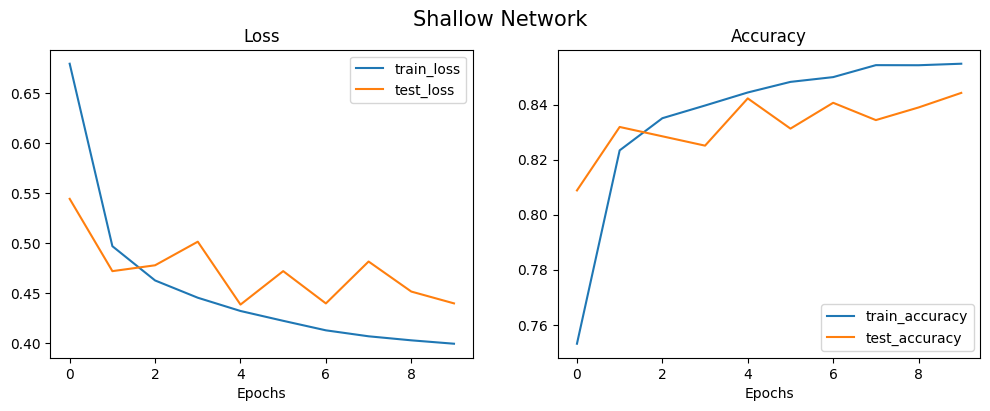

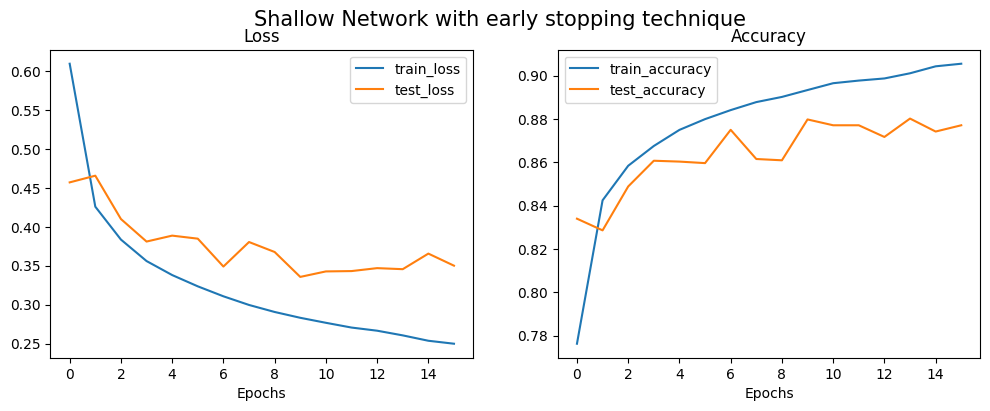

In [18]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_earlystopping, title="Shallow Network with early stopping technique")

## Effect of Batch Normalization

In [19]:
torch.manual_seed(42)
shallow_model_normalized = ShallowModelNormalized(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_normalized.parameters(), lr=0.1)

In [20]:
results_shallow_normalized = train(
    shallow_model_normalized,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)

 10%|████▍                                       | 1/10 [00:05<00:49,  5.55s/it]

Epoch: 1 | train_loss: 0.5145 | train_acc: 0.8155 | test_loss: 0.4793 | test_acc: 0.8277



 20%|████████▊                                   | 2/10 [00:11<00:44,  5.52s/it]

Epoch: 2 | train_loss: 0.4122 | train_acc: 0.8525 | test_loss: 0.4288 | test_acc: 0.8476



 30%|█████████████▏                              | 3/10 [00:16<00:38,  5.47s/it]

Epoch: 3 | train_loss: 0.3862 | train_acc: 0.8588 | test_loss: 0.4131 | test_acc: 0.8482



 40%|█████████████████▌                          | 4/10 [00:22<00:32,  5.50s/it]

Epoch: 4 | train_loss: 0.3709 | train_acc: 0.8653 | test_loss: 0.4106 | test_acc: 0.8520



 50%|██████████████████████                      | 5/10 [00:27<00:27,  5.50s/it]

Epoch: 5 | train_loss: 0.3559 | train_acc: 0.8715 | test_loss: 0.3840 | test_acc: 0.8603



 60%|██████████████████████████▍                 | 6/10 [00:33<00:22,  5.52s/it]

Epoch: 6 | train_loss: 0.3459 | train_acc: 0.8730 | test_loss: 0.3940 | test_acc: 0.8598



 70%|██████████████████████████████▊             | 7/10 [00:38<00:16,  5.51s/it]

Epoch: 7 | train_loss: 0.3391 | train_acc: 0.8752 | test_loss: 0.3664 | test_acc: 0.8697



 80%|███████████████████████████████████▏        | 8/10 [00:44<00:11,  5.52s/it]

Epoch: 8 | train_loss: 0.3331 | train_acc: 0.8781 | test_loss: 0.4010 | test_acc: 0.8556



 90%|███████████████████████████████████████▌    | 9/10 [00:49<00:05,  5.51s/it]

Epoch: 9 | train_loss: 0.3227 | train_acc: 0.8813 | test_loss: 0.3780 | test_acc: 0.8611


100%|███████████████████████████████████████████| 10/10 [00:55<00:00,  5.51s/it]

Epoch: 10 | train_loss: 0.3203 | train_acc: 0.8816 | test_loss: 0.3908 | test_acc: 0.8610


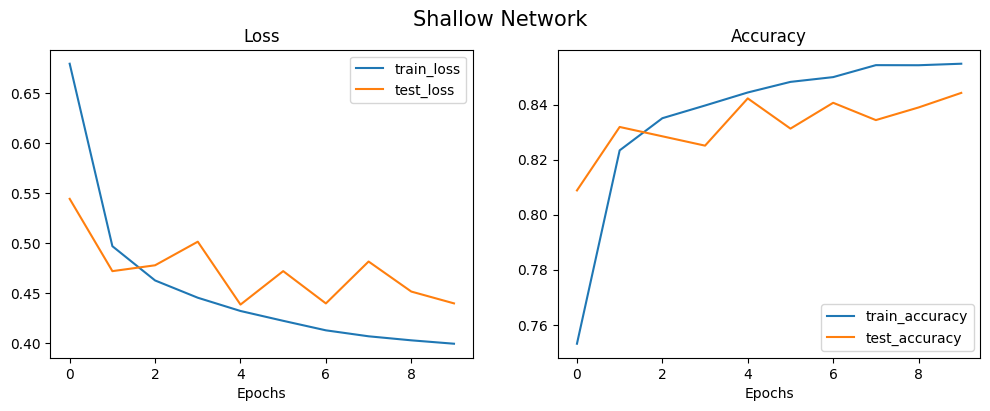

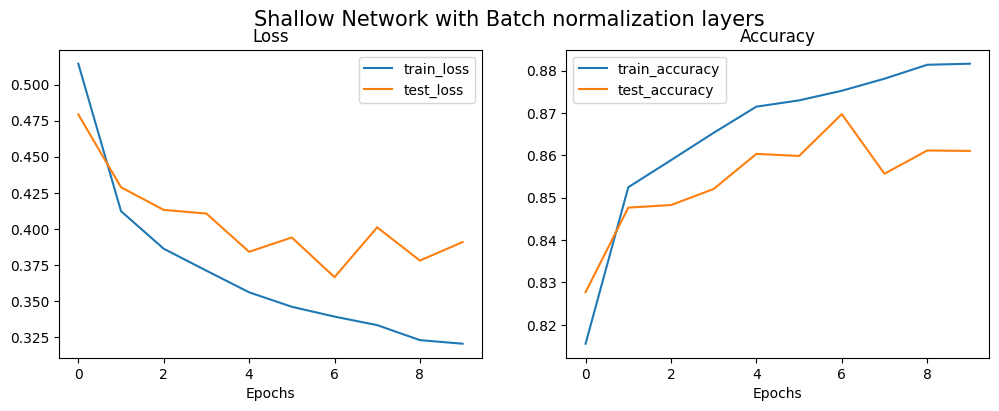

In [21]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_normalized, title="Shallow Network with Batch normalization layers")

## L1 and L2 Regularization

In [22]:
torch.manual_seed(42)
shallow_model_regularized_l1 = ShallowModel(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_regularized_l1.parameters(), lr=0.01)

In [23]:
results_shallow_regularized_l1 = train(
    shallow_model_regularized_l1,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device,
    l1=0.001)

 10%|████▍                                       | 1/10 [00:05<00:49,  5.48s/it]

Epoch: 1 | train_loss: 1.8599 | train_acc: 0.6010 | test_loss: 1.2980 | test_acc: 0.7360



 20%|████████▊                                   | 2/10 [00:10<00:43,  5.46s/it]

Epoch: 2 | train_loss: 1.1309 | train_acc: 0.7631 | test_loss: 1.0435 | test_acc: 0.7778



 30%|█████████████▏                              | 3/10 [00:16<00:38,  5.48s/it]

Epoch: 3 | train_loss: 0.9878 | train_acc: 0.7888 | test_loss: 0.9662 | test_acc: 0.7878



 40%|█████████████████▌                          | 4/10 [00:21<00:32,  5.49s/it]

Epoch: 4 | train_loss: 0.9251 | train_acc: 0.8012 | test_loss: 0.9208 | test_acc: 0.7894



 50%|██████████████████████                      | 5/10 [00:27<00:27,  5.49s/it]

Epoch: 5 | train_loss: 0.8823 | train_acc: 0.8072 | test_loss: 0.8946 | test_acc: 0.7974



 60%|██████████████████████████▍                 | 6/10 [00:32<00:22,  5.50s/it]

Epoch: 6 | train_loss: 0.8509 | train_acc: 0.8120 | test_loss: 0.8434 | test_acc: 0.8116



 70%|██████████████████████████████▊             | 7/10 [00:38<00:16,  5.49s/it]

Epoch: 7 | train_loss: 0.8257 | train_acc: 0.8182 | test_loss: 0.8346 | test_acc: 0.8128



 80%|███████████████████████████████████▏        | 8/10 [00:43<00:10,  5.47s/it]

Epoch: 8 | train_loss: 0.8062 | train_acc: 0.8206 | test_loss: 0.8341 | test_acc: 0.8086



 90%|███████████████████████████████████████▌    | 9/10 [00:49<00:05,  5.47s/it]

Epoch: 9 | train_loss: 0.7926 | train_acc: 0.8232 | test_loss: 0.8152 | test_acc: 0.8114


100%|███████████████████████████████████████████| 10/10 [00:54<00:00,  5.49s/it]

Epoch: 10 | train_loss: 0.7811 | train_acc: 0.8263 | test_loss: 0.7930 | test_acc: 0.8180


In [24]:
torch.manual_seed(42)
shallow_model_regularized_l2 = ShallowModel(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_regularized_l2.parameters(), lr=0.01)

In [25]:
results_shallow_regularized_l2 = train(
    shallow_model_regularized_l2,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device,
    l2=0.0001)

 10%|████▍                                       | 1/10 [00:05<00:49,  5.55s/it]

Epoch: 1 | train_loss: 1.0922 | train_acc: 0.6211 | test_loss: 0.6764 | test_acc: 0.7581



 20%|████████▊                                   | 2/10 [00:11<00:44,  5.53s/it]

Epoch: 2 | train_loss: 0.5884 | train_acc: 0.7919 | test_loss: 0.5567 | test_acc: 0.8007



 30%|█████████████▏                              | 3/10 [00:16<00:38,  5.55s/it]

Epoch: 3 | train_loss: 0.5114 | train_acc: 0.8195 | test_loss: 0.5137 | test_acc: 0.8165



 40%|█████████████████▌                          | 4/10 [00:22<00:33,  5.57s/it]

Epoch: 4 | train_loss: 0.4751 | train_acc: 0.8328 | test_loss: 0.5000 | test_acc: 0.8182



 50%|██████████████████████                      | 5/10 [00:27<00:27,  5.56s/it]

Epoch: 5 | train_loss: 0.4522 | train_acc: 0.8407 | test_loss: 0.4733 | test_acc: 0.8334



 60%|██████████████████████████▍                 | 6/10 [00:33<00:22,  5.58s/it]

Epoch: 6 | train_loss: 0.4361 | train_acc: 0.8465 | test_loss: 0.4584 | test_acc: 0.8385



 70%|██████████████████████████████▊             | 7/10 [00:38<00:16,  5.56s/it]

Epoch: 7 | train_loss: 0.4214 | train_acc: 0.8530 | test_loss: 0.4491 | test_acc: 0.8401



 80%|███████████████████████████████████▏        | 8/10 [00:44<00:11,  5.58s/it]

Epoch: 8 | train_loss: 0.4085 | train_acc: 0.8569 | test_loss: 0.4423 | test_acc: 0.8422



 90%|███████████████████████████████████████▌    | 9/10 [00:50<00:05,  5.58s/it]

Epoch: 9 | train_loss: 0.3978 | train_acc: 0.8602 | test_loss: 0.4274 | test_acc: 0.8477


100%|███████████████████████████████████████████| 10/10 [00:55<00:00,  5.58s/it]

Epoch: 10 | train_loss: 0.3887 | train_acc: 0.8629 | test_loss: 0.4230 | test_acc: 0.8509


In [26]:
torch.manual_seed(42)
shallow_model_regularized_l1_l2 = ShallowModel(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_regularized_l1_l2.parameters(), lr=0.01)

In [27]:
results_shallow_regularized_l1_l2 = train(
    shallow_model_regularized_l1_l2,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device,
    l1=0.001,
    l2=0.0001)

 10%|████▍                                       | 1/10 [00:06<00:55,  6.17s/it]

Epoch: 1 | train_loss: 1.8605 | train_acc: 0.6010 | test_loss: 1.2985 | test_acc: 0.7359



 20%|████████▊                                   | 2/10 [00:12<00:49,  6.21s/it]

Epoch: 2 | train_loss: 1.1315 | train_acc: 0.7629 | test_loss: 1.0441 | test_acc: 0.7778



 30%|█████████████▏                              | 3/10 [00:18<00:43,  6.18s/it]

Epoch: 3 | train_loss: 0.9885 | train_acc: 0.7887 | test_loss: 0.9668 | test_acc: 0.7876



 40%|█████████████████▌                          | 4/10 [00:24<00:37,  6.22s/it]

Epoch: 4 | train_loss: 0.9258 | train_acc: 0.8012 | test_loss: 0.9214 | test_acc: 0.7897



 50%|██████████████████████                      | 5/10 [00:31<00:31,  6.22s/it]

Epoch: 5 | train_loss: 0.8829 | train_acc: 0.8071 | test_loss: 0.8954 | test_acc: 0.7973



 60%|██████████████████████████▍                 | 6/10 [00:37<00:24,  6.19s/it]

Epoch: 6 | train_loss: 0.8516 | train_acc: 0.8118 | test_loss: 0.8441 | test_acc: 0.8115



 70%|██████████████████████████████▊             | 7/10 [00:43<00:18,  6.20s/it]

Epoch: 7 | train_loss: 0.8264 | train_acc: 0.8183 | test_loss: 0.8353 | test_acc: 0.8136



 80%|███████████████████████████████████▏        | 8/10 [00:49<00:12,  6.20s/it]

Epoch: 8 | train_loss: 0.8069 | train_acc: 0.8204 | test_loss: 0.8347 | test_acc: 0.8085



 90%|███████████████████████████████████████▌    | 9/10 [00:55<00:06,  6.17s/it]

Epoch: 9 | train_loss: 0.7933 | train_acc: 0.8231 | test_loss: 0.8164 | test_acc: 0.8109


100%|███████████████████████████████████████████| 10/10 [01:01<00:00,  6.19s/it]

Epoch: 10 | train_loss: 0.7818 | train_acc: 0.8263 | test_loss: 0.7938 | test_acc: 0.8179


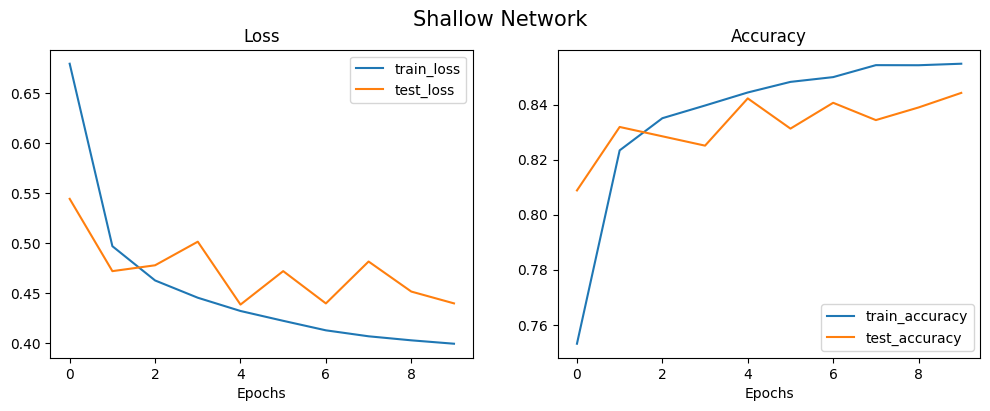

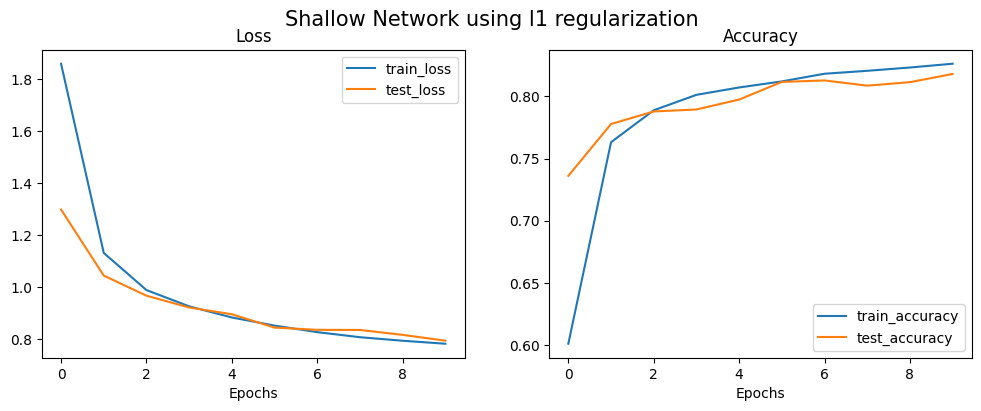

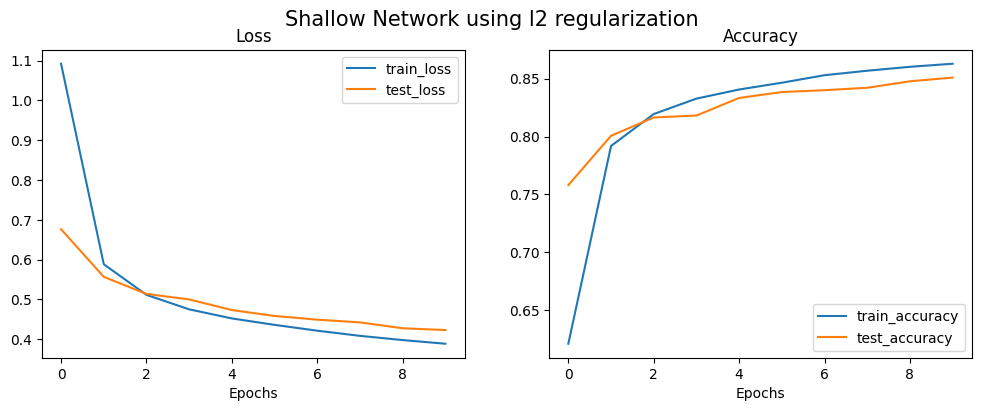

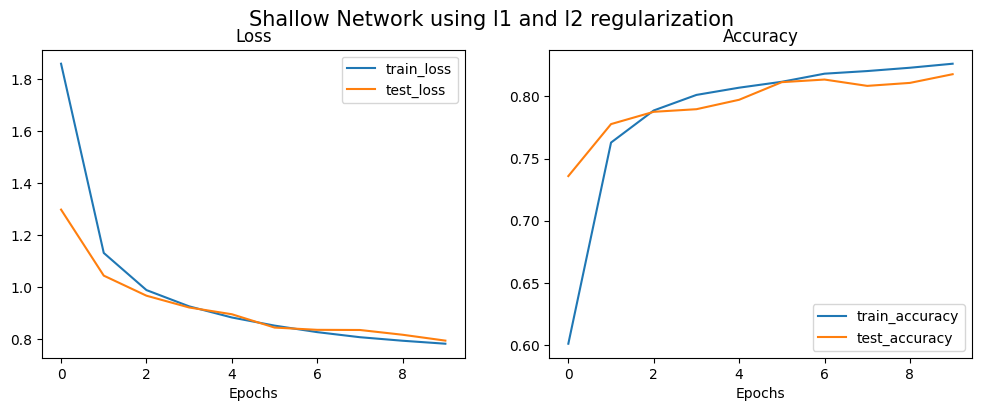

In [28]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_regularized_l1, title="Shallow Network using l1 regularization")
plot_loss_curves(results_shallow_regularized_l2, title="Shallow Network using l2 regularization")
plot_loss_curves(results_shallow_regularized_l1_l2, title="Shallow Network using l1 and l2 regularization")

## Regularizing a Layer parameters

In [29]:
torch.manual_seed(42)
shallow_model_regularized_layer = ShallowModel(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=shallow_model_regularized_layer.parameters(), lr=0.01)

In [30]:
results_shallow_regularized_layer = train(
    shallow_model_regularized_layer,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device,
    regularized_layer=shallow_model_regularized_layer.stacked_layers[1])

 10%|████▍                                       | 1/10 [00:05<00:47,  5.31s/it]

Epoch: 1 | train_loss: 1.1376 | train_acc: 0.6213 | test_loss: 0.7247 | test_acc: 0.7580



 20%|████████▊                                   | 2/10 [00:10<00:42,  5.33s/it]

Epoch: 2 | train_loss: 0.6375 | train_acc: 0.7915 | test_loss: 0.6059 | test_acc: 0.8002



 30%|█████████████▏                              | 3/10 [00:16<00:37,  5.36s/it]

Epoch: 3 | train_loss: 0.5617 | train_acc: 0.8192 | test_loss: 0.5637 | test_acc: 0.8162



 40%|█████████████████▌                          | 4/10 [00:21<00:32,  5.35s/it]

Epoch: 4 | train_loss: 0.5260 | train_acc: 0.8326 | test_loss: 0.5520 | test_acc: 0.8176



 50%|██████████████████████                      | 5/10 [00:26<00:26,  5.37s/it]

Epoch: 5 | train_loss: 0.5039 | train_acc: 0.8404 | test_loss: 0.5257 | test_acc: 0.8338



 60%|██████████████████████████▍                 | 6/10 [00:32<00:21,  5.38s/it]

Epoch: 6 | train_loss: 0.4885 | train_acc: 0.8458 | test_loss: 0.5092 | test_acc: 0.8378



 70%|██████████████████████████████▊             | 7/10 [00:37<00:16,  5.36s/it]

Epoch: 7 | train_loss: 0.4743 | train_acc: 0.8521 | test_loss: 0.5011 | test_acc: 0.8401



 80%|███████████████████████████████████▏        | 8/10 [00:42<00:10,  5.33s/it]

Epoch: 8 | train_loss: 0.4619 | train_acc: 0.8556 | test_loss: 0.4970 | test_acc: 0.8396



 90%|███████████████████████████████████████▌    | 9/10 [00:48<00:05,  5.35s/it]

Epoch: 9 | train_loss: 0.4518 | train_acc: 0.8600 | test_loss: 0.4801 | test_acc: 0.8465


100%|███████████████████████████████████████████| 10/10 [00:53<00:00,  5.35s/it]

Epoch: 10 | train_loss: 0.4429 | train_acc: 0.8625 | test_loss: 0.4749 | test_acc: 0.8505


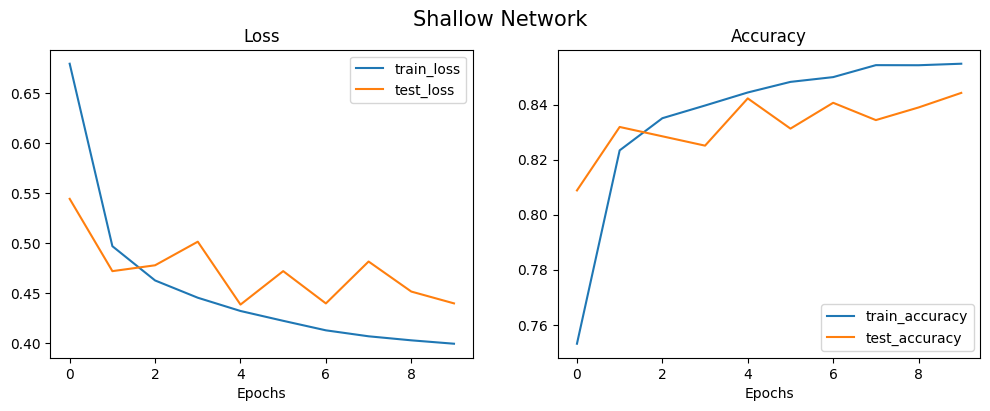

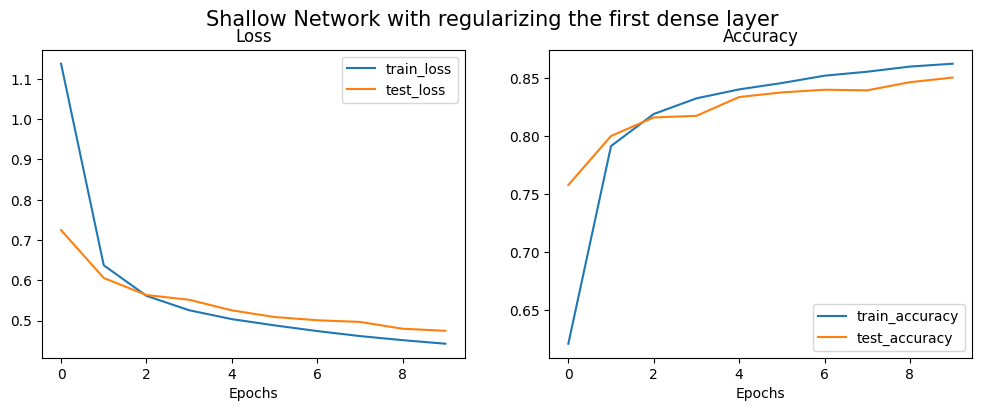

In [31]:
plot_loss_curves(results_shallow, title="Shallow Network")
plot_loss_curves(results_shallow_regularized_layer, title="Shallow Network with regularizing the first dense layer")

## Mix Model

In [32]:
torch.manual_seed(42)
mix_model = MixMLP(
    input_shape=784,
    hidden_units=50,
    output_shape=len(class_names)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=mix_model.parameters(), lr=0.1)

In [33]:
results_mix_model = train(
    mix_model,
    train_dataloader,
    test_dataloader,
    optimizer, 
    loss_fn,
    epochs=100,
    device=device,
    early_stopping=True)

  1%|▍                                          | 1/100 [00:06<11:16,  6.84s/it]

Epoch: 1 | train_loss: 0.6736 | train_acc: 0.7611 | test_loss: 0.4736 | test_acc: 0.8255



  2%|▊                                          | 2/100 [00:13<10:52,  6.65s/it]

Epoch: 2 | train_loss: 0.5575 | train_acc: 0.8049 | test_loss: 0.4541 | test_acc: 0.8339



  3%|█▎                                         | 3/100 [00:20<10:52,  6.73s/it]

Epoch: 3 | train_loss: 0.5242 | train_acc: 0.8156 | test_loss: 0.4354 | test_acc: 0.8434



  4%|█▋                                         | 4/100 [00:26<10:41,  6.68s/it]

Epoch: 4 | train_loss: 0.5022 | train_acc: 0.8231 | test_loss: 0.4351 | test_acc: 0.8391



  5%|██▏                                        | 5/100 [00:33<10:31,  6.65s/it]

Epoch: 5 | train_loss: 0.4941 | train_acc: 0.8274 | test_loss: 0.4349 | test_acc: 0.8416



  6%|██▌                                        | 6/100 [00:39<10:22,  6.62s/it]

Epoch: 6 | train_loss: 0.4863 | train_acc: 0.8285 | test_loss: 0.4241 | test_acc: 0.8473



  7%|███                                        | 7/100 [00:46<10:10,  6.56s/it]

Epoch: 7 | train_loss: 0.4778 | train_acc: 0.8323 | test_loss: 0.4161 | test_acc: 0.8469



  8%|███▍                                       | 8/100 [00:53<10:05,  6.58s/it]

Epoch: 8 | train_loss: 0.4699 | train_acc: 0.8348 | test_loss: 0.4084 | test_acc: 0.8515



  9%|███▊                                       | 9/100 [00:59<09:58,  6.57s/it]

Epoch: 9 | train_loss: 0.4644 | train_acc: 0.8366 | test_loss: 0.4323 | test_acc: 0.8388



 10%|████▏                                     | 10/100 [01:06<09:54,  6.61s/it]

Epoch: 10 | train_loss: 0.4632 | train_acc: 0.8362 | test_loss: 0.4025 | test_acc: 0.8543



 11%|████▌                                     | 11/100 [01:12<09:43,  6.56s/it]

Epoch: 11 | train_loss: 0.4547 | train_acc: 0.8418 | test_loss: 0.4051 | test_acc: 0.8523



 12%|█████                                     | 12/100 [01:19<09:36,  6.55s/it]

Epoch: 12 | train_loss: 0.4505 | train_acc: 0.8420 | test_loss: 0.3996 | test_acc: 0.8546



 13%|█████▍                                    | 13/100 [01:25<09:32,  6.58s/it]

Epoch: 13 | train_loss: 0.4485 | train_acc: 0.8429 | test_loss: 0.4031 | test_acc: 0.8535



 14%|█████▉                                    | 14/100 [01:32<09:31,  6.65s/it]

Epoch: 14 | train_loss: 0.4419 | train_acc: 0.8439 | test_loss: 0.4006 | test_acc: 0.8552



 15%|██████▎                                   | 15/100 [01:39<09:25,  6.66s/it]

Epoch: 15 | train_loss: 0.4379 | train_acc: 0.8450 | test_loss: 0.3984 | test_acc: 0.8565



 16%|██████▋                                   | 16/100 [01:45<09:17,  6.64s/it]

Epoch: 16 | train_loss: 0.4355 | train_acc: 0.8450 | test_loss: 0.3968 | test_acc: 0.8544



 17%|███████▏                                  | 17/100 [01:52<09:09,  6.62s/it]

Epoch: 17 | train_loss: 0.4322 | train_acc: 0.8477 | test_loss: 0.4043 | test_acc: 0.8535



 18%|███████▌                                  | 18/100 [01:59<09:03,  6.63s/it]

Epoch: 18 | train_loss: 0.4348 | train_acc: 0.8470 | test_loss: 0.3922 | test_acc: 0.8571



 19%|███████▉                                  | 19/100 [02:05<08:54,  6.60s/it]

Epoch: 19 | train_loss: 0.4361 | train_acc: 0.8457 | test_loss: 0.3887 | test_acc: 0.8579



 20%|████████▍                                 | 20/100 [02:12<08:49,  6.62s/it]

Epoch: 20 | train_loss: 0.4342 | train_acc: 0.8460 | test_loss: 0.3944 | test_acc: 0.8554



 21%|████████▊                                 | 21/100 [02:19<08:43,  6.63s/it]

Epoch: 21 | train_loss: 0.4313 | train_acc: 0.8472 | test_loss: 0.3870 | test_acc: 0.8605



 22%|█████████▏                                | 22/100 [02:25<08:35,  6.60s/it]

Epoch: 22 | train_loss: 0.4301 | train_acc: 0.8486 | test_loss: 0.3861 | test_acc: 0.8591



 23%|█████████▋                                | 23/100 [02:32<08:28,  6.60s/it]

Epoch: 23 | train_loss: 0.4275 | train_acc: 0.8492 | test_loss: 0.3867 | test_acc: 0.8611



 24%|██████████                                | 24/100 [02:38<08:20,  6.58s/it]

Epoch: 24 | train_loss: 0.4238 | train_acc: 0.8508 | test_loss: 0.3864 | test_acc: 0.8582



 25%|██████████▌                               | 25/100 [02:45<08:14,  6.60s/it]

Epoch: 25 | train_loss: 0.4213 | train_acc: 0.8520 | test_loss: 0.3889 | test_acc: 0.8590



 26%|██████████▉                               | 26/100 [02:52<08:09,  6.62s/it]

Epoch: 26 | train_loss: 0.4222 | train_acc: 0.8527 | test_loss: 0.3874 | test_acc: 0.8620



 27%|███████████▎                              | 27/100 [02:58<08:00,  6.58s/it]

Epoch: 27 | train_loss: 0.4201 | train_acc: 0.8511 | test_loss: 0.3955 | test_acc: 0.8557



 28%|███████████▊                              | 28/100 [03:05<07:52,  6.56s/it]

Epoch: 28 | train_loss: 0.4219 | train_acc: 0.8521 | test_loss: 0.3868 | test_acc: 0.8597



 29%|████████████▏                             | 29/100 [03:11<07:47,  6.59s/it]

Epoch: 29 | train_loss: 0.4196 | train_acc: 0.8522 | test_loss: 0.3859 | test_acc: 0.8612



 30%|████████████▌                             | 30/100 [03:18<07:41,  6.59s/it]

Epoch: 30 | train_loss: 0.4143 | train_acc: 0.8540 | test_loss: 0.3897 | test_acc: 0.8564



 31%|█████████████                             | 31/100 [03:24<07:37,  6.62s/it]

Epoch: 31 | train_loss: 0.4176 | train_acc: 0.8520 | test_loss: 0.3877 | test_acc: 0.8580



 32%|█████████████▍                            | 32/100 [03:31<07:32,  6.66s/it]

Epoch: 32 | train_loss: 0.4167 | train_acc: 0.8537 | test_loss: 0.3806 | test_acc: 0.8628



 33%|█████████████▊                            | 33/100 [03:38<07:24,  6.63s/it]

Epoch: 33 | train_loss: 0.4127 | train_acc: 0.8540 | test_loss: 0.3819 | test_acc: 0.8628



 34%|██████████████▎                           | 34/100 [03:44<07:15,  6.60s/it]

Epoch: 34 | train_loss: 0.4113 | train_acc: 0.8541 | test_loss: 0.3973 | test_acc: 0.8559



 35%|██████████████▋                           | 35/100 [03:51<07:09,  6.60s/it]

Epoch: 35 | train_loss: 0.4117 | train_acc: 0.8545 | test_loss: 0.3849 | test_acc: 0.8589



 36%|███████████████                           | 36/100 [03:58<07:02,  6.60s/it]

Epoch: 36 | train_loss: 0.4085 | train_acc: 0.8547 | test_loss: 0.3811 | test_acc: 0.8624



 37%|███████████████▌                          | 37/100 [04:04<06:56,  6.61s/it]

Epoch: 37 | train_loss: 0.4079 | train_acc: 0.8554 | test_loss: 0.3919 | test_acc: 0.8603



 37%|███████████████▌                          | 37/100 [04:11<07:07,  6.79s/it]

Epoch: 38 | train_loss: 0.4109 | train_acc: 0.8548 | test_loss: 0.3906 | test_acc: 0.8604


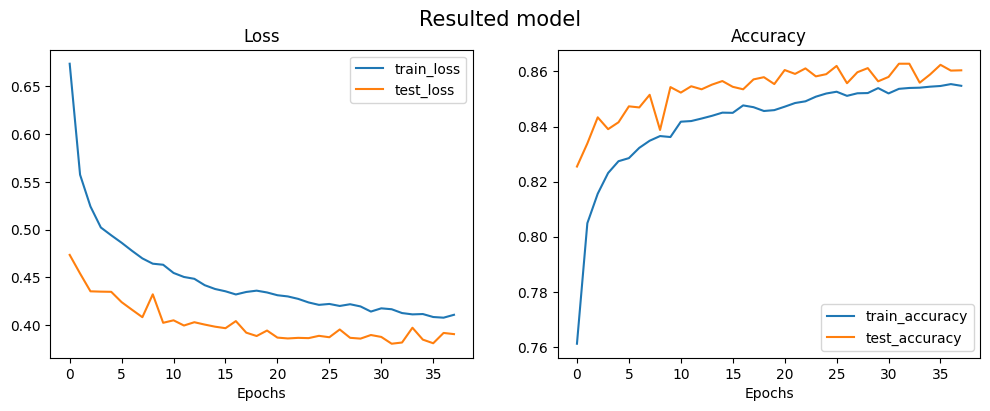

In [34]:
plot_loss_curves(results_mix_model, title="Resulted model")

## Aggregating the resutls

In [35]:
import pandas as pd


results = [results_shallow, results_deep, results_shallow_high_neuron, results_shallow_dropout,
           results_shallow_earlystopping, results_shallow_normalized, results_shallow_regularized_l1,
           results_shallow_regularized_l2, results_shallow_regularized_l1_l2, results_shallow_regularized_layer,
           results_mix_model]

result_columns = ['Model Name', 'Train Accuracy Last Epoch', 'Test Accuracy Last Epoch']
result_df = pd.DataFrame(columns=result_columns)
result_model_names = ['Shallow network',
                      'Deeper network', 
                      'Shallow network with higher number of neurons in each hidden layer', 
                      'Shallow network using dropout layers',
                      'Shallow network using early stopping',
                      'Shallow network using batch normalization layers',
                      'Shallow network using l1 regularization',
                      'Shallow network using l2 regularization',
                      'Shallow network using l1 and l2 regularization'
                      'Shallow network with first layer parameters regularized',
                      'Mix model'
]

for index, (name, result) in enumerate(zip(result_model_names, results)):
    result_df.loc[index, 'Model Name'] = name
    result_df.loc[index, 'Train Accuracy Last Epoch'] = result['train_acc'][-1]
    result_df.loc[index, 'Test Accuracy Last Epoch'] = result['test_acc'][-1]
    
result_df

,Model Name,Train Accuracy Last Epoch,Test Accuracy Last Epoch
0,Shallow network,0.85485,0.844249
1,Deeper network,0.81935,0.808207
2,Shallow network with higher number of neurons ...,0.893367,0.879792
3,Shallow network using dropout layers,0.862683,0.867712
4,Shallow network using early stopping,0.905517,0.877097
5,Shallow network using batch normalization layers,0.8816,0.861022
6,Shallow network using l1 regularization,0.82625,0.817991
7,Shallow network using l2 regularization,0.862917,0.850938
8,Shallow network using l1 and l2 regularization...,0.826333,0.817891
9,Mix model,0.86245,0.850539


In [36]:
result_df.sort_values(by=['Test Accuracy Last Epoch'], ascending=False, inplace=True)
result_df

,Model Name,Train Accuracy Last Epoch,Test Accuracy Last Epoch
2,Shallow network with higher number of neurons ...,0.893367,0.879792
4,Shallow network using early stopping,0.905517,0.877097
3,Shallow network using dropout layers,0.862683,0.867712
5,Shallow network using batch normalization layers,0.8816,0.861022
7,Shallow network using l2 regularization,0.862917,0.850938
9,Mix model,0.86245,0.850539
0,Shallow network,0.85485,0.844249
6,Shallow network using l1 regularization,0.82625,0.817991
8,Shallow network using l1 and l2 regularization...,0.826333,0.817891
1,Deeper network,0.81935,0.808207
